**Homework-02-regression**

Dataset:Car Fuel Efficiency dataset

In [3]:
import os
print(os.getcwd())

c:\PYTHON\Projects\machine-learning-zoomcamp-homework\02-linear regression


In [4]:
!curl -o .\car_fuel_efficiency.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  853k    0  8268    0     0  11758      0  0:01:14 --:--:--  0:01:14 11777
100  853k  100  853k    0     0   820k      0  0:00:01  0:00:01 --:--:--  821k


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [7]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


EDA

<Axes: >

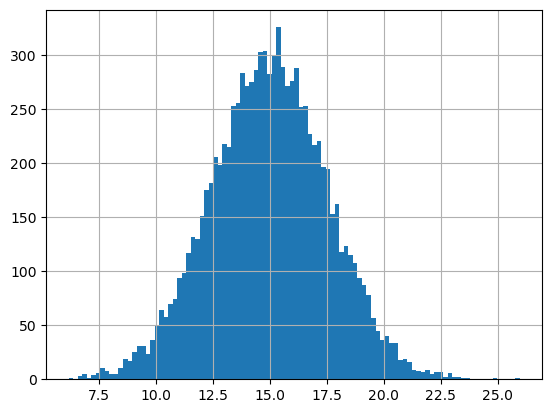

In [8]:
df.fuel_efficiency_mpg.hist(bins=100)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

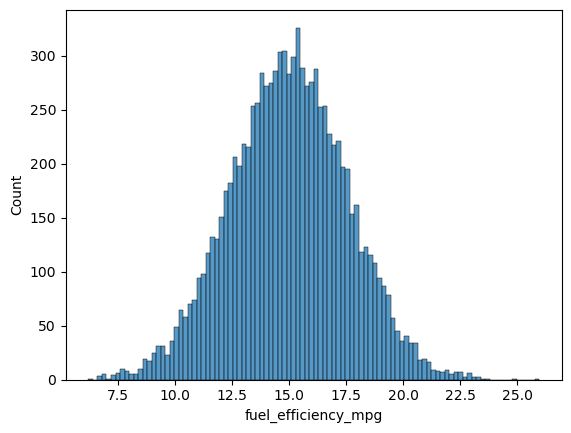

In [9]:
sns.histplot(df.fuel_efficiency_mpg,bins=100)

it looks perfectly normal

Question 1
There's one column with missing values. What is it?

In [10]:
len(df)

9704

In [11]:
df.count()<len(df) # will count all nonnull values and compare with total rows

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [12]:
null_series = df.isnull().sum()>0  # boolean series of columns where 0/null is present more than one time
df.columns[null_series].to_list() # gettn list of such columns for future use and parsing

['horsepower']

Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [14]:
df.horsepower.describe()


count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [15]:
df.horsepower.median()

149.0

In [16]:
df.horsepower.mode()[0]

152.0

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [93]:
# using smae seed of 42
np.random.seed(42)
n = len(df)
idx = np.arange(n) # getting index range 
np.random.shuffle(idx) # shuffling index with seed 42

In [94]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [157]:
# slicinf df inot train val and test sets
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

## Question 3


We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [158]:
# first option: filling with 0:
df_train_0 = df_train.fillna(0)
df_val = df_val.fillna(0)
df_train_mean = df_train.fillna(df_train.horsepower.mean())

In [159]:
y_train_0 = np.log1p(df_train_0.fuel_efficiency_mpg.values)
y_train_mean = np.log1p(df_train_mean.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
y_test

array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
       2.88011043])

In [160]:
del df_train_0['fuel_efficiency_mpg']
del df_train_mean['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [161]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [162]:
w0_0, w_0 = train_linear_regression(df_train_0, y_train_0)
w0_0, w_0

(3.6646662472088183,
 array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673231e-05]))

In [163]:
y_pred_0 = w0_0 + df_train_0.dot(w_0)
y_pred_0

483     2.909816
7506    2.842787
8795    2.933106
1688    2.531355
6217    3.032078
          ...   
1696    2.885802
5685    2.432427
6735    2.923297
2052    3.003055
1776    2.944049
Length: 5824, dtype: float64

<Axes: ylabel='Count'>

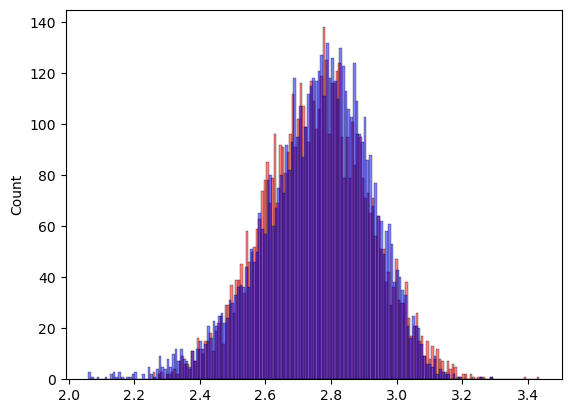

In [164]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=150)
sns.histplot(y_train_0, color='blue', alpha=0.5, bins=150)

In [165]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [166]:
rmse(y_train_0, y_pred_0)

0.0390863253926525

In [105]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [152]:
# Now lets make afull code function to do linreg:

def splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = 42):
    n = len(df)

    # getting quantity parts
    n_val = int(n * val_pct)
    n_test = int(n * test_pct)
    n_train = n - n_val - n_test
    
    # randomizing index
    np.random.seed(shuffle_seed)
    idx = np.arange(n) # getting index range 
    np.random.shuffle(idx) # shuffling index with seed

    # getting train, val and test sets with shuffled index:
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    return df_train, df_val, df_test


def linregFULL_Q3(df_,fillna=0):

    df = df_.copy()

    # getting train, val, test sets:

    df_train, df_val, df_test = splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = 42)

    # preparing train set:
    df_train.horsepower = df_train.horsepower.fillna(fillna)
    df_val.horsepower = df_val.horsepower.fillna(fillna)

    # getting targets:
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    #y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    # deleting the target from training sets
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    # del df_test['fuel_efficiency_mpg']

    # linreg function itself:
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
        
        return w_full[0], w_full[1:]
    
    # getting values for training (aka traingn matrix):
    X_train = df_train.values

    # training:
    w0, w = train_linear_regression(X_train, y_train)
    # print(len(w),w)

    # getting validation predition by multiplying validation matrix by prediction weights vector:
    y_pred = w0 + df_val.dot(w)
    

    # RMS function itself:
    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)
    
    return rmse(y_val,y_pred)


In [167]:
# so now we can compare different fills methods:

RMSE_missing_with_zeros = linregFULL_Q3(df,fillna=0)
RMSE_missing_with_mean_values = linregFULL_Q3(df,fillna=df_train.horsepower.mean())
round(RMSE_missing_with_zeros,2),round(RMSE_missing_with_mean_values,2)

(0.04, 0.04)

In [168]:
# what gives us better RMSE(smaller):
RMSE_missing_with_zeros > RMSE_missing_with_mean_values

True

RMSE_missing_with_mean_values is more accurate

## Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [169]:
# Now lets make a full code function to do linreg WITH REGULARIZATION:


def splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = 42):
    n = len(df)

    # getting quantity parts
    n_val = int(n * val_pct)
    n_test = int(n * test_pct)
    n_train = n - n_val - n_test
    
    # randomizing index
    np.random.seed(shuffle_seed)
    idx = np.arange(n) # getting index range 
    np.random.shuffle(idx) # shuffling index with seed

    # getting train, val and test sets with shuffled index:
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    return df_train, df_val, df_test


def linregFULL_Q4(df_, fillna=0, r = 0.001, r_list = [0.001]):

    df = df_.copy()

  # getting train, val, test sets:

    df_train, df_val, df_test = splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = 42)

    # preparing train set:
    df_train.horsepower = df_train.horsepower.fillna(fillna)
    df_val.horsepower = df_val.horsepower.fillna(fillna)

    # getting targets for training and validation:
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    #y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    # deleting the target from training sets
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    # linreg function itself:
    def train_linear_regression_with_regularization(X, y , r):
        
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX = XTX + r * np.eye(XTX.shape[0])
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
        
        return w_full[0], w_full[1:]
    
    # getting values for training (aka training matrix):
    X_train = df_train.values

    # training:
    w0, w = train_linear_regression_with_regularization(X_train, y_train, r)
    # print(len(w),w)

    # getting validation predition vector by multiplying validation matrix by prediction weights vector:
    y_pred_ = w0 + df_val.dot(w)
    

    # RMSE function itself:
    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)
    
    for r in r_list:
        # training:
        w0, w = train_linear_regression_with_regularization(X_train, y_train, r)
        # print(len(w),w)

        # getting validation predition by multiplying validation matrix by prediction weights vector(normal equation):
        y_pred = w0 + df_val.dot(w)

        RMSE = rmse(y_val,y_pred)
        print(f"________________ R = {r}: ____________________\n")
        print(f'rmse={round(RMSE,2)} \t rmse={round(RMSE,6)}\n')
        
    
    return y_val,y_pred_


In [170]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
y_val,y_pred = linregFULL_Q4(df, fillna=0, r = 0.001, r_list = r_list)
#rmse(y_val,y_pred),y_pred

________________ R = 0: ____________________

rmse=0.04 	 rmse=0.039979

________________ R = 0.01: ____________________

rmse=0.04 	 rmse=0.039978

________________ R = 0.1: ____________________

rmse=0.04 	 rmse=0.040509

________________ R = 1: ____________________

rmse=0.04 	 rmse=0.041354

________________ R = 5: ____________________

rmse=0.04 	 rmse=0.041506

________________ R = 10: ____________________

rmse=0.04 	 rmse=0.041527

________________ R = 100: ____________________

rmse=0.04 	 rmse=0.041546



<Axes: ylabel='Count'>

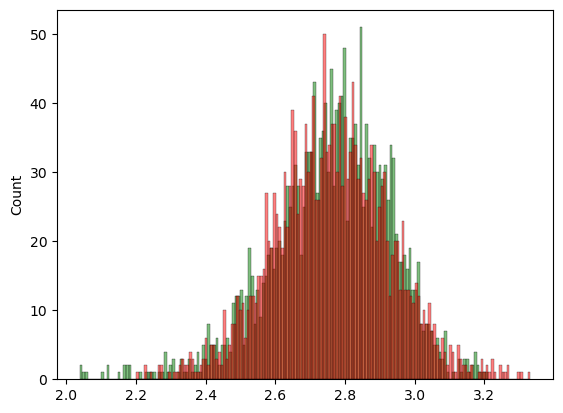

In [171]:
sns.histplot(y_val, bins=150, color='green', alpha=0.5)
sns.histplot(y_pred, bins=150, color='red', alpha=0.5)

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [172]:
# Now lets make a full code function to do linreg USING DIFFERENT SEED:

# linreg function itself:
def train_linear_regression_with_regularization(X, y , r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# RMSE function itself:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


def splitter(df):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    return n, n_val, n_test, n_train


def linregFULL_Q5(df_, fillna=0, r = 0 , seed = [0] ):

    df = df_.copy()

    n, n_val, n_test, n_train = splitter(df)

    rmse_scores = []

    for s in seed:
        np.random.seed(s)
        idx = np.arange(n) # getting index range 
        np.random.shuffle(idx) # shuffling index with seed 42

        # getting train, val, test sets shuffled index:
        df_train = df.iloc[idx[:n_train]].copy()
        df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
        df_test = df.iloc[idx[n_train+n_val:]].copy()

        # preparing train set:
        df_train.horsepower.fillna(fillna,inplace=True)
        df_val.horsepower.fillna(fillna,inplace=True)

        # getting targets for training and validation:
        y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
        y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
        #y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

        # deleting the target from training sets
        del df_train['fuel_efficiency_mpg']
        del df_val['fuel_efficiency_mpg']
        
        # getting values for training (aka training matrix):
        X_train = df_train.values

        # training:
        w0, w = train_linear_regression_with_regularization(X_train, y_train, r)
        # print(len(w),w)

        # getting validation predition vector by multiplying validation matrix by prediction weights vector:
        y_pred_ = w0 + df_val.dot(w)

        rmse_score = rmse(y_val,y_pred_)
        rmse_scores.append(rmse_score)

        print (f'seed = {s},\trmse={rmse_score}')
        
    return rmse_scores

In [173]:
rmse_scores = linregFULL_Q5(df, fillna=0, r = 0 , seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] )

seed = 0,	rmse=0.038017755371704195
seed = 1,	rmse=0.03927885333905149
seed = 2,	rmse=0.03944653052519472
seed = 3,	rmse=0.03872763703743218
seed = 4,	rmse=0.037275358500887396
seed = 5,	rmse=0.03938438833940563
seed = 6,	rmse=0.03890763931419336
seed = 7,	rmse=0.03837971626983621
seed = 8,	rmse=0.040189869753593684
seed = 9,	rmse=0.03860764644096914


In [174]:
rmse_scores

[0.038017755371704195,
 0.03927885333905149,
 0.03944653052519472,
 0.03872763703743218,
 0.037275358500887396,
 0.03938438833940563,
 0.03890763931419336,
 0.03837971626983621,
 0.040189869753593684,
 0.03860764644096914]

In [175]:
rmse_scores = np.array(rmse_scores)
round(rmse_scores.std(),3)

0.001

so the model is quite stable cuz std of rmse is quite low

## Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [176]:
# Now lets make a full code function to do linreg COMBINING the TRAIN and Validation sets:

# linreg function itself:
def train_linear_regression_with_regularization(X, y , r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# RMSE function itself:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


def splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = 9):
    n = len(df)

    # getting quantity parts
    n_val = int(n * val_pct)
    n_test = int(n * test_pct)
    n_train = n - n_val - n_test
    
    # randomizing index
    np.random.seed(shuffle_seed)
    idx = np.arange(n) # getting index range 
    np.random.shuffle(idx) # shuffling index with seed

    # getting train, val and test sets with shuffled index:
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    return df_train, df_val, df_test


def linregFULL_Q6(df_, fillna=0, r = 0.001 , seed = 9 ):

    df = df_.copy()

    df_train, df_val, df_test = splitter(df, val_pct = 0.2, test_pct = 0.2, shuffle_seed = seed)

    # combining train and validation sets:
    X = pd.concat([df_train, df_val])
    
    # preparing train set:
    X.horsepower.fillna(fillna, inplace=True)
    df_test.horsepower.fillna(fillna, inplace=True)

    # getting targets for training and TEST from column "fuel_efficiency_mpg":
    y_train = np.log1p(X.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

    # deleting the target from training sets
    del X['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    # getting values for training (aka training matrix):
    X_train = X.values

    # training:
    w0, w = train_linear_regression_with_regularization(X_train, y_train, r)

    # getting TEST predition vector by multiplying TEST matrix by prediction weights vector:
    y_pred = w0 + df_test.dot(w)

    rmse_score = rmse(y_test,y_pred)

    print (f'rmse = {rmse_score}')
        
    return y_pred, y_test

In [177]:
y_pred, y_test = linregFULL_Q6(df, fillna=0, r = 0.001 , seed = 9 )

rmse = 0.03919613644482941


<Axes: ylabel='Count'>

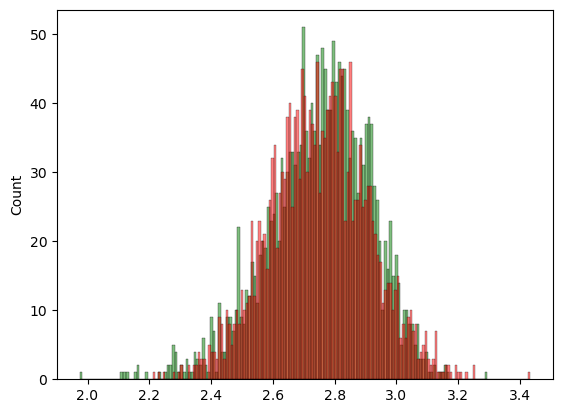

In [178]:
sns.histplot(y_test, bins=150, color='green', alpha=0.5)
sns.histplot(y_pred, bins=150, color='red', alpha=0.5)

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.001, fit_intercept=True, random_state = 9))
])

X = df[['engine_displacement','horsepower','vehicle_weight','model_year']].fillna(0)
Y = df.fuel_efficiency_mpg

X_train, X_test, y_train_s, y_test_s = train_test_split(
    X,
    Y,
    test_size = 0.1999, # to get same number of test size as in  my code
    random_state = 9,
    shuffle=True)
y_train_s = np.log1p(y_train_s)
y_test_s = np.log1p(y_test_s)

# Train the entire pipeline on the raw training data
pipeline.fit(X_train, y_train_s)

# Make predictions on the raw test data
preds_scaled = pipeline.predict(X_test)
rmse_s = np.sqrt(mean_squared_error(y_test_s, preds_scaled))
rmse_s

0.038385233988229864

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

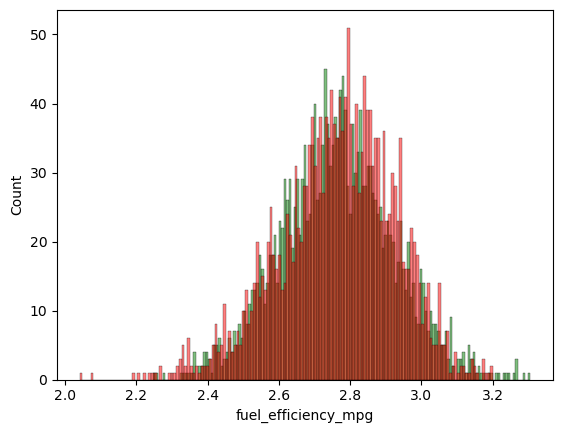

In [181]:
sns.histplot(preds_scaled, bins=150, color='green', alpha=0.5)
sns.histplot(y_test_s, bins=150, color='red', alpha=0.5)